In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import re


In [0]:
pd.set_option('display.max_columns',5000)
np.set_printoptions(suppress=True)

In [4]:
from google.colab import files
files.upload()

Saving train disaster.csv to train disaster (1).csv


{'train disaster.csv': b'id,keyword,location,text,target\n1,,,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1\n4,,,Forest fire near La Ronge Sask. Canada,1\n5,,,All residents asked to \'shelter in place\' are being notified by officers. No other evacuation or shelter in place orders are expected,1\n6,,,"13,000 people receive #wildfires evacuation orders in California ",1\n7,,,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school ,1\n8,,,#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires,1\n10,,,"#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas",1\n13,,,I\'m on top of the hill and I can see a fire in the woods...,1\n14,,,There\'s an emergency evacuation happening now in the building across the street,1\n15,,,I\'m afraid that the tornado is coming to our area...,1\n16,,,Three people died from the heat wave so far,1\n17,,,Haha

In [0]:
Disaster=pd.read_csv('train disaster.csv')

In [6]:
Disaster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [7]:
Disaster.tail(70)

id   keyword              location  \
7543  10784  wreckage                Mumbai   
7544  10785   wrecked          Brooklyn, NY   
7545  10786   wrecked  Robin Hood's County    
7546  10787   wrecked                   NaN   
7547  10788   wrecked         United States   
...     ...       ...                   ...   
7608  10869       NaN                   NaN   
7609  10870       NaN                   NaN   
7610  10871       NaN                   NaN   
7611  10872       NaN                   NaN   
7612  10873       NaN                   NaN   

                                                   text  target  
7543  Wreckage 'Conclusively Confirmed' as From MH37...       1  
7544  Wrecked an hour on YouTube with @julian_lage @...       0  
7545  late night mcdonalds with friends = hilarious ...       0  
7546  good luck to everyone who has school soon but ...       0  
7547  I wonder how times someone has wrecked trying ...       0  
...                                                 ...     ...  
7608  Two giant cranes holding a bridge collapse int...       1  
7609  @aria_ahrary @TheTawniest The out of control w...       1  
7610  M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...       1  
7611  Police investigating after an e-bike collided ...       1  
7612  The Latest: More Homes Razed by Northern Calif...       1  

[70 rows x 5 columns]

In [0]:
Columns=['location','id','keyword']

Disaster.drop(labels=Columns,axis=1,inplace=True)

In [0]:
def stripping(Inpdata):
    cleanedArticle1=re.sub(r'[?|$|.@#=><|!]',r' ',Inpdata)
    cleanedArticle2=re.sub(r'[^a-z A-Z]',r' ',cleanedArticle1)
    cleanedArticle3=cleanedArticle2.lower()
    cleanedArticle4=re.sub(r'\b\w{1,2}\b', ' ',cleanedArticle3)
    cleanedArticle5=re.sub(r'https?://\S+|www\.\S+',r' ',cleanedArticle4)
    cleanedArticle6=re.sub(r' +', ' ',cleanedArticle5)
    return(cleanedArticle6)

In [0]:
Disaster['cleanedTweets']=Disaster['text'].apply(stripping)

In [11]:
Disaster.drop_duplicates

<bound method DataFrame.drop_duplicates of                                                    text  target  \
0     Our Deeds are the Reason of this #earthquake M...       1   
1                Forest fire near La Ronge Sask. Canada       1   
2     All residents asked to 'shelter in place' are ...       1   
3     13,000 people receive #wildfires evacuation or...       1   
4     Just got sent this photo from Ruby #Alaska as ...       1   
...                                                 ...     ...   
7608  Two giant cranes holding a bridge collapse int...       1   
7609  @aria_ahrary @TheTawniest The out of control w...       1   
7610  M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...       1   
7611  Police investigating after an e-bike collided ...       1   
7612  The Latest: More Homes Razed by Northern Calif...       1   

                                          cleanedTweets  
0     our deeds are the reason this earthquake may a...  
1                    forest fire nea

In [12]:
Disaster.head(10)


text  target  \
0  Our Deeds are the Reason of this #earthquake M...       1   
1             Forest fire near La Ronge Sask. Canada       1   
2  All residents asked to 'shelter in place' are ...       1   
3  13,000 people receive #wildfires evacuation or...       1   
4  Just got sent this photo from Ruby #Alaska as ...       1   
5  #RockyFire Update => California Hwy. 20 closed...       1   
6  #flood #disaster Heavy rain causes flash flood...       1   
7  I'm on top of the hill and I can see a fire in...       1   
8  There's an emergency evacuation happening now ...       1   
9  I'm afraid that the tornado is coming to our a...       1   

                                       cleanedTweets  
0  our deeds are the reason this earthquake may a...  
1                 forest fire near ronge sask canada  
2  all residents asked shelter place are being no...  
3   people receive wildfires evacuation orders ca...  
4  just got sent this photo from ruby alaska smok...  
5   rockyfire update california hwy closed both d...  
6   flood disaster heavy rain causes flash floodi...  
7           top the hill and can see fire the woods   
8  there emergency evacuation happening now the b...  
9           afraid that the tornado coming our area

In [0]:
Disaster_NLP=pd.DataFrame(Disaster, columns=['cleanedTweets','target'])

In [14]:
Disaster_NLP.drop_duplicates()

cleanedTweets  target
0     our deeds are the reason this earthquake may a...       1
1                    forest fire near ronge sask canada       1
2     all residents asked shelter place are being no...       1
3      people receive wildfires evacuation orders ca...       1
4     just got sent this photo from ruby alaska smok...       1
...                                                 ...     ...
7603  officials say quarantine place alabama home ov...       1
7605   the flip side walmart and there bomb and ever...       1
7606  suicide bomber kills saudi security site mosqu...       1
7608  two giant cranes holding bridge collapse into ...       1
7612  the latest more homes razed northern californi...       1

[7493 rows x 2 columns]

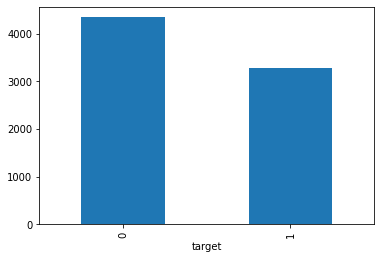

In [15]:
Disaster_NLP.groupby('target').size().plot(kind='bar')

In [16]:
Disaster_NLP

cleanedTweets  target
0     our deeds are the reason this earthquake may a...       1
1                    forest fire near ronge sask canada       1
2     all residents asked shelter place are being no...       1
3      people receive wildfires evacuation orders ca...       1
4     just got sent this photo from ruby alaska smok...       1
...                                                 ...     ...
7608  two giant cranes holding bridge collapse into ...       1
7609   aria ahrary thetawniest the out control wild ...       1
7610                 utc volcano hawaii http zdtoyd ebj       1
7611  police investigating after bike collided with ...       1
7612  the latest more homes razed northern californi...       1

[7613 rows x 2 columns]

In [0]:
from nltk import word_tokenize, pos_tag

In [0]:
def extractNounsAdjectives(Inpdata):
    wordtokenize=nltk.word_tokenize(Inpdata)
    Exrtracttweet=nltk.pos_tag(wordtokenize)
    if Exrtracttweet[0]in ['NN','NNP','NNS','NNPS']:
        return(Exrtracttweet[0])

In [0]:
Disaster_NLP['stopwards']=Disaster_NLP['cleanedTweets'].apply(extractNounsAdjectives)

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS


In [0]:
vectorizer = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS)
X = vectorizer.fit_transform(Disaster_NLP['cleanedTweets'])

In [0]:
Disaster_Ml=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names())

In [0]:
Z=Disaster_NLP['target'].values
Disaster_Ml['Targetvalues']=Z

In [21]:
Disaster_Ml.head(10)

aaaa  aaaaaaallll  aaaaaand  aaarrrgghhh  aace  aag  aal  aamir  aan  \
0   0.0          0.0       0.0          0.0   0.0  0.0  0.0    0.0  0.0   
1   0.0          0.0       0.0          0.0   0.0  0.0  0.0    0.0  0.0   
2   0.0          0.0       0.0          0.0   0.0  0.0  0.0    0.0  0.0   
3   0.0          0.0       0.0          0.0   0.0  0.0  0.0    0.0  0.0   
4   0.0          0.0       0.0          0.0   0.0  0.0  0.0    0.0  0.0   
5   0.0          0.0       0.0          0.0   0.0  0.0  0.0    0.0  0.0   
6   0.0          0.0       0.0          0.0   0.0  0.0  0.0    0.0  0.0   
7   0.0          0.0       0.0          0.0   0.0  0.0  0.0    0.0  0.0   
8   0.0          0.0       0.0          0.0   0.0  0.0  0.0    0.0  0.0   
9   0.0          0.0       0.0          0.0   0.0  0.0  0.0    0.0  0.0   

   aannnnd  aar  aaronthefm  aashiqui  aatt  aauizggc  aawzxykles  aba  \
0      0.0  0.0         0.0       0.0   0.0       0.0         0.0  0.0   
1      0.0  0.0         0.0       0.0   0.0       0.0         0.0  0.0   
2      0.0  0.0         0.0       0.0   0.0       0.0         0.0  0.0   
3      0.0  0.0         0.0       0.0   0.0       0.0         0.0  0.0   
4      0.0  0.0         0.0       0.0   0.0       0.0         0.0  0.0   
5      0.0  0.0         0.0       0.0   0.0       0.0         0.0  0.0   
6      0.0  0.0         0.0       0.0   0.0       0.0         0.0  0.0   
7      0.0  0.0         0.0       0.0   0.0       0.0         0.0  0.0   
8      0.0  0.0         0.0       0.0   0.0       0.0         0.0  0.0   
9      0.0  0.0         0.0       0.0   0.0       0.0         0.0  0.0   

   abandon  abandoned  abandonedpics  abandoning  abbandoned  abbott  \
0      0.0        0.0            0.0         0.0         0.0     0.0   
1      0.0        0.0            0.0         0.0         0.0     0.0   
2      0.0        0.0            0.0         0.0         0.0     0.0   
3      0.0        0.0            0.0         0.0         0.0     0.0   
4      0.0        0.0            0.0         0.0         0.0     0.0   
5      0.0        0.0            0.0         0.0         0.0     0.0   
6      0.0        0.0            0.0         0.0         0.0     0.0   
7      0.0        0.0            0.0         0.0         0.0     0.0   
8      0.0        0.0            0.0         0.0         0.0     0.0   
9      0.0        0.0            0.0         0.0         0.0     0.0   

   abbruchsimulator  abbswinston  abbyairshow  abc  abcnews  abcnorio  abe  \
0               0.0          0.0          0.0  0.0      0.0       0.0  0.0   
1               0.0          0.0          0.0  0.0      0.0       0.0  0.0   
2               0.0          0.0          0.0  0.0      0.0       0.0  0.0   
3               0.0          0.0          0.0  0.0      0.0       0.0  0.0   
4               0.0          0.0          0.0  0.0      0.0       0.0  0.0   
5               0.0          0.0          0.0  0.0      0.0       0.0  0.0   
6               0.0          0.0          0.0  0.0      0.0       0.0  0.0   
7               0.0          0.0          0.0  0.0      0.0       0.0  0.0   
8               0.0          0.0          0.0  0.0      0.0       0.0  0.0   
9               0.0          0.0          0.0  0.0      0.0       0.0  0.0   

   aberdeen  aberdeenfanpage  aberdeenfc  aberystwyth  abgct  abgfglh  abha  \
0       0.0              0.0         0.0          0.0    0.0      0.0   0.0   
1       0.0              0.0         0.0          0.0    0.0      0.0   0.0   
2       0.0              0.0         0.0          0.0    0.0      0.0   0.0   
3       0.0              0.0         0.0          0.0    0.0      0.0   0.0   
4       0.0              0.0         0.0          0.0    0.0      0.0   0.0   
5       0.0              0.0         0.0          0.0    0.0      0.0   0.0   
6       0.0              0.0         0.0          0.0    0.0      0.0   0.0   
7       0.0              0.0         0.0          0.0    0.0      0.0   0.0   

In [22]:
Disaster_Ml.groupby('Targetvalues').count()

aaaa  aaaaaaallll  aaaaaand  aaarrrgghhh  aace   aag   aal  \
Targetvalues                                                               
0             4342         4342      4342         4342  4342  4342  4342   
1             3271         3271      3271         3271  3271  3271  3271   

              aamir   aan  aannnnd   aar  aaronthefm  aashiqui  aatt  \
Targetvalues                                                           
0              4342  4342     4342  4342        4342      4342  4342   
1              3271  3271     3271  3271        3271      3271  3271   

              aauizggc  aawzxykles   aba  abandon  abandoned  abandonedpics  \
Targetvalues                                                                  
0                 4342        4342  4342     4342       4342           4342   
1                 3271        3271  3271     3271       3271           3271   

              abandoning  abbandoned  abbott  abbruchsimulator  abbswinston  \
Targetvalues                                                                  
0                   4342        4342    4342              4342         4342   
1                   3271        3271    3271              3271         3271   

              abbyairshow   abc  abcnews  abcnorio   abe  aberdeen  \
Targetvalues                                                         
0                    4342  4342     4342      4342  4342      4342   
1                    3271  3271     3271      3271  3271      3271   

              aberdeenfanpage  aberdeenfc  aberystwyth  abgct  abgfglh  abha  \
Targetvalues                                                                   
0                        4342        4342         4342   4342     4342  4342   
1                        3271        3271         3271   3271     3271  3271   

              abia  ability  abject  ablaze  able  ableg  ablz  abninfvet  \
Targetvalues                                                                
0             4342     4342    4342    4342  4342   4342  4342       4342   
1             3271     3271    3271    3271  3271   3271  3271       3271   

              abnzqwlig  aboard  abolxmh  abomb  abomination  abortion  \
Targetvalues                                                             
0                  4342    4342     4342   4342         4342      4342   
1                  3271    3271     3271   3271         3271      3271   

              abortions  abouts   abq  abran   abs  absence  absolut  \
Targetvalues                                                           
0                  4342    4342  4342   4342  4342     4342     4342   
1                  3271    3271  3271   3271  3271     3271     3271   

              absolute  absolutely  abstorm  abstract  absurd  absurdly   abu  \
Targetvalues                                                                    
0                 4342        4342     4342      4342    4342      4342  4342   
1                 3271        3271     3271      3271    3271      3271  3271   

              abuse  abused  abuses  abusing  abyhrgss  abysmaljoiner  \
Targetvalues                                                            
0              4342    4342    4342     4342      4342           4342   
1              3271    3271    3271     3271      3271           3271   

              acaciapenn  academia  acarewornheart   acb   acc  accept  \
Targetvalues                                                             
0                   4342      4342            4342  4342  4342    4342   
1                   3271      3271            3271  3271  3271    3271   

              accepte  accepts  access  accf  accident  accidentally  \
Targetvalues                                                           
0                4342     4342    4342  4342      4342          4342   
1                3271     3271    3271  3271      3271          3271   

              accidentalprophecy  accidently  accidents  accionempresa  \
Targetvalue

In [23]:
Disaster_Ml.shape

(7613, 21213)

In [0]:
y=Disaster_NLP['target'].values
predictors=Disaster_Ml.columns
X=Disaster_Ml[predictors].values


In [25]:
X[0:50]

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [0]:
## Applying Linear Discriminant Ananlysis on the the Dataset

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [0]:
Lda=LinearDiscriminantAnalysis(n_components=1)
reduced_data = Lda.fit(X,y).transform(X)

In [0]:
principalDf = pd.DataFrame(data = reduced_data, columns = ['PC-1'])
finalDf = pd.concat([principalDf, Disaster_NLP['target']], axis = 1)


In [29]:
finalDf.groupby('target').count()

PC-1
target      
0       4342
1       3271

In [30]:
Total=4342+3271
Zero=(4342/Total)*100
one=(3271/Total)*100
print(Zero)
print(one)


57.03402075397347
42.96597924602653


In [0]:
from sklearn.model_selection import train_test_split
Predictors=['PC-1']
Target=['target']
X=finalDf[Predictors].values
y=finalDf[Target].values


In [32]:
print(X.shape)
print(y.shape)

(7613, 1)
(7613, 1)


In [125]:
from sklearn.ensemble import RandomForestClassifier
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=3500)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6090, 21213)
(1523, 21213)
(6090,)
(1523,)


In [0]:
from sklearn import metrics

In [0]:
def RandomForest_classifier(Data1,Data2):
    Test_size=[0.30,0.25,0.21,0.26,0.33,0.36,0.42,0.45]
    Random_state=[521457,7505,32578,5,2567,4789,8547,657]
    AverageAccuracy=[]
    k=0
    print('/'*60)
    for i in Test_size:
        for j in Random_state:
            print('/'*60)
            print("The Test_size",i,"and random state is",j) 
            X_train,X_test,y_train,y_test=train_test_split(Data1,Data2,test_size=i,random_state=j)
            RFC =RandomForestClassifier(max_depth=3, n_estimators=300,criterion='entropy')
            predictModel=RFC.fit(X_train,y_train)
            predictions=predictModel.predict(X_test)
            print(metrics.classification_report(y_test, predictions))
            print(metrics.confusion_matrix(y_test, predictions))
            F1score=metrics.classification_report(y_test, predictions).split()[-2]
            F1=float(F1score)
            AverageAccuracy.append(F1)
            k=k+1
            print("Accuracy is ",F1score)
    return(k,AverageAccuracy) 

In [128]:
length,AVGAccuracy=RandomForest_classifier(X,y)
Sum_of_Acc_Dtree=sum(AVGAccuracy)
print("The Average of All acuracies",(Sum_of_Acc_Dtree/length))



////////////////////////////////////////////////////////////
////////////////////////////////////////////////////////////
The Test_size 0.3 and random state is 521457
              precision    recall  f1-score   support

           0       0.56      1.00      0.72      1282
           1       1.00      0.00      0.00      1002

    accuracy                           0.56      2284
   macro avg       0.78      0.50      0.36      2284
weighted avg       0.75      0.56      0.41      2284

[[1282    0]
 [1000    2]]
Accuracy is  0.41
////////////////////////////////////////////////////////////
The Test_size 0.3 and random state is 7505
              precision    recall  f1-score   support

           0       0.57      1.00      0.72      1290
           1       1.00      0.00      0.01       994

    accuracy                           0.57      2284
   macro avg       0.78      0.50      0.37      2284
weighted avg       0.75      0.57      0.41      2284

[[1290    0]
 [ 990    4]]
Acc

KeyboardInterrupt: ignored

In [0]:
def Logistic_Regression(Data1,Data2):
    from sklearn.linear_model import LogisticRegression
    Test_size=[0.30,0.20,0.23,0.26,0.33,0.36,0.42,0.45]
    Random_state=[521457,50,32578,5,2567,4789,8547,657]
    AverageAccuracy=[]
    k=0
    print('/'*60)
    for i in Test_size:
        for j in Random_state:
            print('/'*60)
            print("The Test_size",i,"and random state is",j) 
            X_train,X_test,y_train,y_test=train_test_split(Data1,Data2,test_size=i,random_state=j)
            lgf=LogisticRegression(C=2,penalty='l2', solver='liblinear')
            predictModel=lgf.fit(X_train,y_train)
            predictions=predictModel.predict(X_test)
            print(metrics.classification_report(y_test, predictions))
            print(metrics.confusion_matrix(y_test, predictions))
            F1score=metrics.classification_report(y_test, predictions).split()[-2]
            F1=float(F1score)
            AverageAccuracy.append(F1)
            k=k+1
            print("Accuracy is ",F1score)
    return(k,AverageAccuracy)  

In [41]:
length,AVGAccuracy=Logistic_Regression(X,y)
Sum_of_Acc=sum(AVGAccuracy)
print("The Average of All acuracies",(Sum_of_Acc/length))

////////////////////////////////////////////////////////////
////////////////////////////////////////////////////////////
The Test_size 0.3 and random state is 521457
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1282
           1       0.99      1.00      1.00      1002

    accuracy                           1.00      2284
   macro avg       1.00      1.00      1.00      2284
weighted avg       1.00      1.00      1.00      2284

[[1275    7]
 [   3  999]]
Accuracy is  1.00
////////////////////////////////////////////////////////////
The Test_size 0.3 and random state is 50
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1270
           1       0.99      1.00      0.99      1014

    accuracy                           1.00      2284
   macro avg       1.00      1.00      1.00      2284
weighted avg       1.00      1.00      1.00      2284

[[1264    6]
 [   5 1009]]
Accur

In [0]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [0]:
def Adaboost_Classifier(Data1,Data2):
    Test_size=[0.30,0.25,0.21,0.22,0.33,0.36,0.42,0.45,0.34]
    Random_state=[521457,7505,32578,5,2567,4789,8547,657,42]
    AverageAccuracy=[]
    k=0
    print('/'*60)
    for i in Test_size:
        for j in Random_state:
            print('/'*60)
            print("The Test_size",i,"and random state is",j) 
            X_train,X_test,y_train,y_test=train_test_split(Data1,Data2,test_size=i,random_state=j)
            DTC=DecisionTreeClassifier(max_depth=5)
            ADA = AdaBoostClassifier(n_estimators=150, base_estimator=DTC ,learning_rate=0.01)
            predictModel=ADA.fit(X_train,y_train)
            predictions=predictModel.predict(X_test)
            print(metrics.classification_report(y_test, predictions))
            print(metrics.confusion_matrix(y_test, predictions))
            F1score=metrics.classification_report(y_test, predictions).split()[-2]
            F1=float(F1score)
            AverageAccuracy.append(F1)
            k=k+1
            print("Accuracy is ",F1score)
    return(k,AverageAccuracy,ADA ) 

In [44]:
length,AVGAccuracy,AD=Adaboost_Classifier(X,y)
Sum_of_Acc_Dtree=sum(AVGAccuracy)
print("The Average of All acuracies",(Sum_of_Acc_Dtree/length))


////////////////////////////////////////////////////////////
////////////////////////////////////////////////////////////
The Test_size 0.3 and random state is 521457
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1282
           1       0.99      1.00      1.00      1002

    accuracy                           1.00      2284
   macro avg       1.00      1.00      1.00      2284
weighted avg       1.00      1.00      1.00      2284

[[1275    7]
 [   3  999]]
Accuracy is  1.00
////////////////////////////////////////////////////////////
The Test_size 0.3 and random state is 7505
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1290
           1       1.00      0.99      0.99       994

    accuracy                           0.99      2284
   macro avg       0.99      0.99      0.99      2284
weighted avg       0.99      0.99      0.99      2284

[[1289    1]
 [  12  982]]
Acc

In [0]:
from xgboost import XGBClassifier

In [0]:
def Xgboost_classifier(Data1,Data2):
    Test_size=[0.30,0.25,0.21,0.22,0.33,0.36,0.42,0.45,0.34]
    Random_state=[521457,7505,32578,5,2567,4789,8547,657,42]
    AverageAccuracy=[]
    k=0
    print('/'*60)
    for i in Test_size:
        for j in Random_state:
            print('/'*60)
            print("The Test_size",i,"and random state is",j) 
            X_train,X_test,y_train,y_test=train_test_split(Data1,Data2,test_size=i,random_state=j)
            xgb=XGBClassifier(max_depth=5, learning_rate=0.01, n_estimators=400, objective='binary:logistic', booster='gbtree')
            predictModel=xgb.fit(X_train,y_train)
            predictions=predictModel.predict(X_test)
            print(metrics.classification_report(y_test, predictions))
            print(metrics.confusion_matrix(y_test, predictions))
            F1score=metrics.classification_report(y_test, predictions).split()[-2]
            F1=float(F1score)
            AverageAccuracy.append(F1)
            k=k+1
            print("Accuracy is ",F1score)
    return(k,AverageAccuracy,xgb )

In [47]:
length,AvgACC,XG=Xgboost_classifier(X,y)
Sum_of_Acc_Dtree=sum(AvgACC)
print("The Average of All acuracies",(Sum_of_Acc_Dtree/length))

////////////////////////////////////////////////////////////
////////////////////////////////////////////////////////////
The Test_size 0.3 and random state is 521457
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1282
           1       0.99      1.00      1.00      1002

    accuracy                           1.00      2284
   macro avg       1.00      1.00      1.00      2284
weighted avg       1.00      1.00      1.00      2284

[[1275    7]
 [   3  999]]
Accuracy is  1.00
////////////////////////////////////////////////////////////
The Test_size 0.3 and random state is 7505
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1290
           1       1.00      0.99      0.99       994

    accuracy                           0.99      2284
   macro avg       0.99      0.99      0.99      2284
weighted avg       0.99      0.99      0.99      2284

[[1289    1]
 [  12  982]]
Acc

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

In [0]:
def GradientBoostClassifier(Data1,Data2):
    Test_size=[0.30,0.25,0.21,0.22,0.33,0.36,0.42,0.45,0.34]
    Random_state=[521457,7505,32578,5,2567,4789,8547,657,42]
    AverageAccuracy=[]
    k=0
    print('/'*60)
    for i in Test_size:
        for j in Random_state:
            print('/'*60)
            print("The Test_size",i,"and random state is",j) 
            X_train,X_test,y_train,y_test=train_test_split(Data1,Data2,test_size=i,random_state=j)
            GBC=GradientBoostingClassifier(max_depth=5,learning_rate=0.01,n_estimators=300,)
            predictModel=GBC.fit(X_train,y_train)
            predictions=predictModel.predict(X_test)
            print(metrics.classification_report(y_test, predictions))
            print(metrics.confusion_matrix(y_test, predictions))
            F1score=metrics.classification_report(y_test, predictions).split()[-2]
            F1=float(F1score)
            AverageAccuracy.append(F1)
            k=k+1
            print("Accuracy is ",F1score)
    return(k,AverageAccuracy, GBC ) 

In [50]:
length,AverageAcc,GB=GradientBoostClassifier(X,y)
Sum_of_Acc_Dtree=sum(AverageAcc)
print("The Average of All acuracies",(Sum_of_Acc_Dtree/length))

////////////////////////////////////////////////////////////
////////////////////////////////////////////////////////////
The Test_size 0.3 and random state is 521457
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1282
           1       0.99      1.00      1.00      1002

    accuracy                           1.00      2284
   macro avg       1.00      1.00      1.00      2284
weighted avg       1.00      1.00      1.00      2284

[[1275    7]
 [   3  999]]
Accuracy is  1.00
////////////////////////////////////////////////////////////
The Test_size 0.3 and random state is 7505
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1290
           1       1.00      0.99      0.99       994

    accuracy                           0.99      2284
   macro avg       0.99      0.99      0.99      2284
weighted avg       0.99      0.99      0.99      2284

[[1289    1]
 [  12  982]]
Acc

In [0]:
from lightgbm import LGBMClassifier

In [0]:
def lightbgmclassifier(Data1,Data2):
    Test_size=[0.30,0.25,0.21,0.22,0.33,0.36,0.42,0.45,0.34]
    Random_state=[521457,7505,32578,5,2567,4789,8547,657,42]
    AverageAccuracy=[]
    k=0
    print('/'*60)
    for i in Test_size:
        for j in Random_state:
            print('/'*60)
            print("The Test_size",i,"and random state is",j) 
            X_train,X_test,y_train,y_test=train_test_split(Data1,Data2,test_size=i,random_state=j)
            lgb=LGBMClassifier(max_depth=-1,learning_rate=0.1,n_estimators=300)
            predictModel=lgb.fit(X_train,y_train)
            predictions=predictModel.predict(X_test)
            print(metrics.classification_report(y_test, predictions))
            print(metrics.confusion_matrix(y_test, predictions))
            F1score=metrics.classification_report(y_test, predictions).split()[-2]
            F1=float(F1score)
            AverageAccuracy.append(F1)
            k=k+1
            print("Accuracy is ",F1score)
    return(k,AverageAccuracy, lgb ) 

In [53]:
length,AverageAcc,LGB=lightbgmclassifier(X,y)
Sum_of_Acc_Dtree=sum(AverageAcc)
print("The Average of All acuracies",(Sum_of_Acc_Dtree/length))

////////////////////////////////////////////////////////////
////////////////////////////////////////////////////////////
The Test_size 0.3 and random state is 521457
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1282
           1       0.99      1.00      1.00      1002

    accuracy                           1.00      2284
   macro avg       1.00      1.00      1.00      2284
weighted avg       1.00      1.00      1.00      2284

[[1275    7]
 [   3  999]]
Accuracy is  1.00
////////////////////////////////////////////////////////////
The Test_size 0.3 and random state is 7505
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1290
           1       1.00      0.99      0.99       994

    accuracy                           0.99      2284
   macro avg       0.99      0.99      0.99      2284
weighted avg       0.99      0.99      0.99      2284

[[1289    1]
 [  12  982]]
Acc

In [0]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn import metrics

In [0]:
def NaiveBayesClassifier(Data1,Data2):
    Test_size=[0.30,0.25,0.21,0.22,0.33,0.36,0.42,0.45,0.34]
    Random_state=[525478,7505,32578,3257,2567,4789,8547,657,42]
    AverageAccuracy=[]
    k=0
    print('/'*60)
    for i in Test_size:
        for j in Random_state:
            print('/'*60)
            print("The Test_size",i,"and random state is",j) 
            X_train,X_test,y_train,y_test=train_test_split(Data1,Data2,test_size=i,random_state=j)
            GNB=GaussianNB()
            predictModel=GNB.fit(X_train,y_train)
            predictions=predictModel.predict(X_test)
            print(metrics.classification_report(y_test, predictions))
            print(metrics.confusion_matrix(y_test, predictions))
            F1score=metrics.classification_report(y_test, predictions).split()[-2]
            F1=float(F1score)
            AverageAccuracy.append(F1)
            k=k+1
            print("Accuracy is ",F1score)
    return(k,AverageAccuracy,GNB)             
                                  

In [38]:
length,AverageAcc,GNB=NaiveBayesClassifier(X,y)
Sum_of_Acc_Dtree=sum(AverageAcc)
print("The Average of All acuracies",(Sum_of_Acc_Dtree/length))

////////////////////////////////////////////////////////////
////////////////////////////////////////////////////////////
The Test_size 0.3 and random state is 525478
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1314
           1       0.99      1.00      0.99       970

    accuracy                           1.00      2284
   macro avg       0.99      1.00      1.00      2284
weighted avg       1.00      1.00      1.00      2284

[[1306    8]
 [   3  967]]
Accuracy is  1.00
////////////////////////////////////////////////////////////
The Test_size 0.3 and random state is 7505
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1290
           1       1.00      0.99      1.00       994

    accuracy                           1.00      2284
   macro avg       1.00      1.00      1.00      2284
weighted avg       1.00      1.00      1.00      2284

[[1286    4]
 [   5  989]]
Acc

In [59]:
!pip install catboost

     |████████████████████████████████| 64.8MB 91kB/s 


In [0]:
import catboost

In [0]:
def CatboostClassifier(Data1,Data2):
    Test_size=[0.30,0.25,0.21,0.22,0.33,0.36,0.42,0.45,0.34]
    Random_state=[525478,7505,32578,3257,2567,4789,8547,657,42]
    AverageAccuracy=[]
    k=0
    print('/'*60)
    for i in Test_size:
        for j in Random_state:
            print('/'*60)
            print("The Test_size",i,"and random state is",j) 
            X_train,X_test,y_train,y_test=train_test_split(Data1,Data2,test_size=i,random_state=j)
            cat=catboost.CatBoostClassifier(iterations=200,learning_rate=0.01,depth=2,loss_function='Logloss')
            predictModel=cat.fit(X_train,y_train)
            predictions=predictModel.predict(X_test)
            print(metrics.classification_report(y_test, predictions))
            print(metrics.confusion_matrix(y_test, predictions))
            F1score=metrics.classification_report(y_test, predictions).split()[-2]
            F1=float(F1score)
            AverageAccuracy.append(F1)
            k=k+1
            print("Accuracy is ",F1score)
    return(k,AverageAccuracy)             
                                      

In [62]:
length,AverageAcc=CatboostClassifier(X,y)
Sum_of_Acc_Dtree=sum(AverageAcc)
print("The Average of All acuracies",(Sum_of_Acc_Dtree/length))

Streaming output truncated to the last 5000 lines.
136:	learn: 0.0123004	total: 211ms	remaining: 96.9ms
137:	learn: 0.0122027	total: 212ms	remaining: 95.3ms
138:	learn: 0.0120911	total: 214ms	remaining: 93.8ms
139:	learn: 0.0119878	total: 216ms	remaining: 92.4ms
140:	learn: 0.0119108	total: 217ms	remaining: 90.8ms
141:	learn: 0.0118154	total: 219ms	remaining: 89.3ms
142:	learn: 0.0117234	total: 220ms	remaining: 87.7ms
143:	learn: 0.0116488	total: 222ms	remaining: 86.2ms
144:	learn: 0.0115528	total: 223ms	remaining: 84.7ms
145:	learn: 0.0114678	total: 225ms	remaining: 83.1ms
146:	learn: 0.0113884	total: 226ms	remaining: 81.6ms
147:	learn: 0.0112983	total: 228ms	remaining: 80.1ms
148:	learn: 0.0112114	total: 229ms	remaining: 78.5ms
149:	learn: 0.0111289	total: 231ms	remaining: 77ms
150:	learn: 0.0110491	total: 233ms	remaining: 75.5ms
151:	learn: 0.0109870	total: 234ms	remaining: 73.9ms
152:	learn: 0.0109106	total: 236ms	remaining: 72.4ms
153:	learn: 0.0108378	total: 237ms	remaining: 70.8


NB=0.9979012345679013 is best

In [39]:
from google.colab import files
files.upload()

Saving test Disaster.csv to test Disaster (1).csv


{'test Disaster.csv': b'id,keyword,location,text\n0,,,Just happened a terrible car crash\n2,,,"Heard about #earthquake is different cities, stay safe everyone."\n3,,,"there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all"\n9,,,Apocalypse lighting. #Spokane #wildfires\n11,,,Typhoon Soudelor kills 28 in China and Taiwan\n12,,,We\'re shaking...It\'s an earthquake\n21,,,"They\'d probably still show more life than Arsenal did yesterday, eh? EH?"\n22,,,Hey! How are you?\n27,,,What a nice hat?\n29,,,Fuck off!\n30,,,No I don\'t like cold!\n35,,,NOOOOOOOOO! Don\'t do that!\n42,,,No don\'t tell me that!\n43,,,What if?!\n45,,,Awesome!\n46,ablaze,London,Birmingham Wholesale Market is ablaze BBC News - Fire breaks out at Birmingham\'s Wholesale Market http://t.co/irWqCEZWEU\n47,ablaze,Niall\'s place | SAF 12 SQUAD |,@sunkxssedharry will you wear shorts for race ablaze ?\n51,ablaze,NIGERIA,#PreviouslyOnDoyinTv: Toke Makinwa\xc2\x89\xc3\x9b\xc2\xaas marriage

In [0]:
DisasterTest=pd.read_csv('test Disaster.csv')

In [41]:
DisasterTest

id keyword location  \
0         0     NaN      NaN   
1         2     NaN      NaN   
2         3     NaN      NaN   
3         9     NaN      NaN   
4        11     NaN      NaN   
...     ...     ...      ...   
3258  10861     NaN      NaN   
3259  10865     NaN      NaN   
3260  10868     NaN      NaN   
3261  10874     NaN      NaN   
3262  10875     NaN      NaN   

                                                   text  
0                    Just happened a terrible car crash  
1     Heard about #earthquake is different cities, s...  
2     there is a forest fire at spot pond, geese are...  
3              Apocalypse lighting. #Spokane #wildfires  
4         Typhoon Soudelor kills 28 in China and Taiwan  
...                                                 ...  
3258  EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...  
3259  Storm in RI worse than last hurricane. My city...  
3260  Green Line derailment in Chicago http://t.co/U...  
3261  MEG issues Hazardous Weather Outlook (HWO) htt...  
3262  #CityofCalgary has activated its Municipal Eme...  

[3263 rows x 4 columns]

In [0]:
DisasterTest=DisasterTest.drop(labels=['keyword','location'],axis=1)

In [43]:
DisasterTest

id                                               text
0         0                 Just happened a terrible car crash
1         2  Heard about #earthquake is different cities, s...
2         3  there is a forest fire at spot pond, geese are...
3         9           Apocalypse lighting. #Spokane #wildfires
4        11      Typhoon Soudelor kills 28 in China and Taiwan
...     ...                                                ...
3258  10861  EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259  10865  Storm in RI worse than last hurricane. My city...
3260  10868  Green Line derailment in Chicago http://t.co/U...
3261  10874  MEG issues Hazardous Weather Outlook (HWO) htt...
3262  10875  #CityofCalgary has activated its Municipal Eme...

[3263 rows x 2 columns]

In [0]:
def stripping(Inpdata):
    cleanedArticle1=re.sub(r'[?|$|.@#=><|!]',r' ',Inpdata)
    cleanedArticle2=re.sub(r'[^a-z A-Z]',r' ',cleanedArticle1)
    cleanedArticle3=cleanedArticle2.lower()
    cleanedArticle4=re.sub(r'\b\w{1,2}\b', ' ',cleanedArticle3)
    cleanedArticle5=re.sub(r'https?://\S+|www\.\S+',r' ',cleanedArticle4)
    cleanedArticle6=re.sub(r' +', ' ',cleanedArticle5)
    return(cleanedArticle6)

In [0]:
DisasterTest['cleanedTweets']=DisasterTest['text'].apply(stripping)

In [46]:
DisasterTest


id                                               text  \
0         0                 Just happened a terrible car crash   
1         2  Heard about #earthquake is different cities, s...   
2         3  there is a forest fire at spot pond, geese are...   
3         9           Apocalypse lighting. #Spokane #wildfires   
4        11      Typhoon Soudelor kills 28 in China and Taiwan   
...     ...                                                ...   
3258  10861  EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...   
3259  10865  Storm in RI worse than last hurricane. My city...   
3260  10868  Green Line derailment in Chicago http://t.co/U...   
3261  10874  MEG issues Hazardous Weather Outlook (HWO) htt...   
3262  10875  #CityofCalgary has activated its Municipal Eme...   

                                          cleanedTweets  
0                      just happened terrible car crash  
1     heard about earthquake different cities stay s...  
2     there forest fire spot pond geese are fleeing ...  
3                 apocalypse lighting spokane wildfires  
4               typhoon soudelor kills china and taiwan  
...                                                 ...  
3258  earthquake safety los angeles safety fasteners...  
3259  storm worse than last hurricane city amp other...  
3260      green line derailment chicago http utbxlcbiuy  
3261  meg issues hazardous weather outlook hwo http ...  
3262   cityofcalgary has activated its municipal eme...  

[3263 rows x 3 columns]

In [0]:
DisasterTest=DisasterTest.drop(labels=['text'],axis=1)

In [48]:
DisasterTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3263 entries, 0 to 3262
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             3263 non-null   int64 
 1   cleanedTweets  3263 non-null   object
dtypes: int64(1), object(1)
memory usage: 51.1+ KB


In [49]:
DisasterTest.drop_duplicates

<bound method DataFrame.drop_duplicates of          id                                      cleanedTweets
0         0                   just happened terrible car crash
1         2  heard about earthquake different cities stay s...
2         3  there forest fire spot pond geese are fleeing ...
3         9              apocalypse lighting spokane wildfires
4        11            typhoon soudelor kills china and taiwan
...     ...                                                ...
3258  10861  earthquake safety los angeles safety fasteners...
3259  10865  storm worse than last hurricane city amp other...
3260  10868      green line derailment chicago http utbxlcbiuy
3261  10874  meg issues hazardous weather outlook hwo http ...
3262  10875   cityofcalgary has activated its municipal eme...

[3263 rows x 2 columns]>

In [0]:
ID=DisasterTest['id']

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS

In [0]:
vectorizer = TfidfVectorizer(stop_words=ENGLISH_STOP_WORDS)
X_Test = vectorizer.fit_transform(DisasterTest['cleanedTweets'])

In [0]:
TestDataFrame=pd.DataFrame(data=X_Test.toarray(), columns=vectorizer.get_feature_names())

In [54]:
TestDataFrame

aaffndcdnq  aahyoeitzl  aapatwork  aaron  aarongoodwin  aaronkearneyaus  \
0            0.0         0.0        0.0    0.0           0.0              0.0   
1            0.0         0.0        0.0    0.0           0.0              0.0   
2            0.0         0.0        0.0    0.0           0.0              0.0   
3            0.0         0.0        0.0    0.0           0.0              0.0   
4            0.0         0.0        0.0    0.0           0.0              0.0   
...          ...         ...        ...    ...           ...              ...   
3258         0.0         0.0        0.0    0.0           0.0              0.0   
3259         0.0         0.0        0.0    0.0           0.0              0.0   
3260         0.0         0.0        0.0    0.0           0.0              0.0   
3261         0.0         0.0        0.0    0.0           0.0              0.0   
3262         0.0         0.0        0.0    0.0           0.0              0.0   

      aasfmvbl  aassfrdp  aawmx  aba  abandoned  abandons  abba  abbog  \
0          0.0       0.0    0.0  0.0        0.0       0.0   0.0    0.0   
1          0.0       0.0    0.0  0.0        0.0       0.0   0.0    0.0   
2          0.0       0.0    0.0  0.0        0.0       0.0   0.0    0.0   
3          0.0       0.0    0.0  0.0        0.0       0.0   0.0    0.0   
4          0.0       0.0    0.0  0.0        0.0       0.0   0.0    0.0   
...        ...       ...    ...  ...        ...       ...   ...    ...   
3258       0.0       0.0    0.0  0.0        0.0       0.0   0.0    0.0   
3259       0.0       0.0    0.0  0.0        0.0       0.0   0.0    0.0   
3260       0.0       0.0    0.0  0.0        0.0       0.0   0.0    0.0   
3261       0.0       0.0    0.0  0.0        0.0       0.0   0.0    0.0   
3262       0.0       0.0    0.0  0.0        0.0       0.0   0.0    0.0   

      abbott  abbss  abbswinston  abbydphillip  abc  abcfmelissajoey  \
0        0.0    0.0          0.0           0.0  0.0              0.0   
1        0.0    0.0          0.0           0.0  0.0              0.0   
2        0.0    0.0          0.0           0.0  0.0              0.0   
3        0.0    0.0          0.0           0.0  0.0              0.0   
4        0.0    0.0          0.0           0.0  0.0              0.0   
...      ...    ...          ...           ...  ...              ...   
3258     0.0    0.0          0.0           0.0  0.0              0.0   
3259     0.0    0.0          0.0           0.0  0.0              0.0   
3260     0.0    0.0          0.0           0.0  0.0              0.0   
3261     0.0    0.0          0.0           0.0  0.0              0.0   
3262     0.0    0.0          0.0           0.0  0.0              0.0   

      abcnetwork  abcnews  abdul  abe  abella  abh  abide  ability  \
0            0.0      0.0    0.0  0.0     0.0  0.0    0.0      0.0   
1            0.0      0.0    0.0  0.0     0.0  0.0    0.0      0.0   
2            0.0      0.0    0.0  0.0     0.0  0.0    0.0      0.0   
3            0.0      0.0    0.0  0.0     0.0  0.0    0.0      0.0   
4            0.0      0.0    0.0  0.0     0.0  0.0    0.0      0.0   
...          ...      ...    ...  ...     ...  ...    ...      ...   
3258         0.0      0.0    0.0  0.0     0.0  0.0    0.0      0.0   
3259         0.0      0.0    0.0  0.0     0.0  0.0    0.0      0.0   
3260         0.0      0.0    0.0  0.0     0.0  0.0    0.0      0.0   
3261         0.0      0.0    0.0  0.0     0.0  0.0    0.0      0.0   
3262         0.0      0.0    0.0  0.0     0.0  0.0    0.0      0.0   

      abkhbhnloz  ablaze  able  abnormally  abolishing  abomination  \
0            0.0     0.0   0.0         0.0         0.0          0.0   
1            0.0     0.0   0.0         0.0         0.0          0.0   
2            0.0     0.0   0.0         0.0         0.0          0.0   
3            0.0     0.0   0.0         0.0         0.0          0.0   
4            0.0     0.0   0.0         0.0         0.0          0.0   
...         

In [55]:
TestDataFrame.shape

(3263, 11864)

In [0]:
Pred=TestDataFrame.columns
Xtestlda=TestDataFrame[Pred].values
y=y[:3263]

In [0]:
Reduced_X=Lda.fit(Xtestlda,y).transform(Xtestlda)

In [0]:
Predictions=GNB.predict(Reduced_X)

In [0]:
SubMissionDataFrame=pd.DataFrame(data=ID,columns=['id'])
SubMissionDataFrame['target']=Predictions

In [62]:
SubMissionDataFrame

id  target
0         0       1
1         2       1
2         3       1
3         9       1
4        11       1
...     ...     ...
3258  10861       0
3259  10865       0
3260  10868       1
3261  10874       0
3262  10875       0

[3263 rows x 2 columns]

In [63]:
SubMissionDataFrame.groupby('target').count()

id
target      
0       1964
1       1299

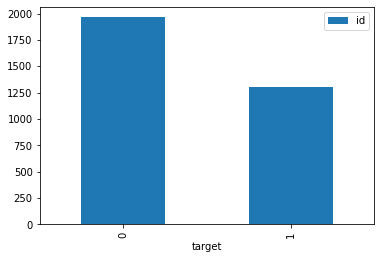

In [64]:
SubMissionDataFrame.groupby('target').count().plot(kind='bar')

In [65]:
Total=1964+1299
Zero=(1964/Total)*100
one=(1299/Total)*100
print(Zero)
print(one)

60.190009193993255
39.80999080600674


In [66]:
Total=4342+3271
Zero=(4342/Total)*100
one=(3271/Total)*100
print(Zero)
print(one)

57.03402075397347
42.96597924602653


In [68]:
SubMissionDataFrame.to_csv(index=False)

'id,target\n0,1\n2,1\n3,1\n9,1\n11,1\n12,1\n21,1\n22,1\n27,1\n29,1\n30,1\n35,1\n42,1\n43,1\n45,1\n46,0\n47,0\n51,0\n58,0\n60,0\n69,0\n70,0\n72,0\n75,0\n84,0\n87,0\n88,0\n90,0\n94,0\n99,0\n101,0\n103,1\n106,0\n108,1\n111,0\n115,0\n116,0\n122,1\n123,1\n124,0\n125,0\n127,0\n140,0\n142,0\n147,0\n148,0\n150,1\n152,1\n154,0\n155,0\n166,1\n167,1\n169,0\n177,1\n179,0\n181,1\n186,1\n188,0\n189,0\n192,1\n200,0\n202,0\n206,0\n207,1\n214,0\n217,1\n223,0\n224,0\n227,1\n228,1\n230,0\n233,0\n234,1\n236,1\n239,1\n250,0\n255,0\n257,1\n259,1\n275,1\n278,0\n282,1\n284,0\n286,1\n288,1\n292,1\n295,1\n300,1\n304,1\n305,1\n306,0\n308,1\n311,1\n317,1\n319,1\n323,1\n324,0\n325,1\n326,0\n333,1\n339,1\n342,0\n343,0\n350,0\n351,0\n357,0\n359,0\n362,0\n366,0\n367,0\n369,0\n373,0\n374,0\n376,0\n377,0\n378,0\n379,0\n382,0\n385,0\n387,0\n388,0\n391,0\n392,0\n395,0\n399,0\n400,0\n403,0\n405,0\n408,0\n411,0\n414,0\n416,0\n417,0\n422,0\n425,0\n428,0\n430,1\n431,1\n433,0\n434,1\n439,1\n441,1\n449,1\n458,1\n460,1\n464,1\n